In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
set()

set()

In [7]:
train_data=pd.read_csv("titanic_train.csv")
test_data=pd.read_csv("titanic_test.csv")

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_data.shape

(891, 12)

In [12]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Checking various null entries in the dataset, with the help of heatmap

In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Visualization of various relationships between variables


<Axes: xlabel='Survived', ylabel='count'>

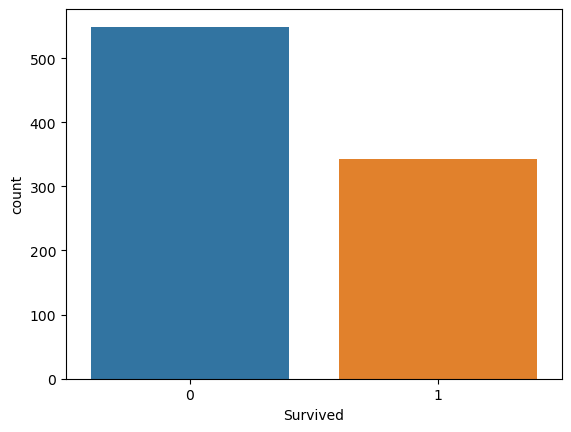

In [15]:
sns.countplot(x='Survived', data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

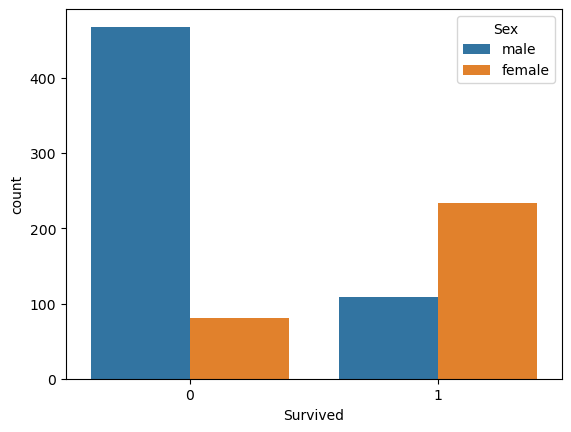

In [16]:
sns.countplot(x='Survived', hue='Sex', data=train_data)

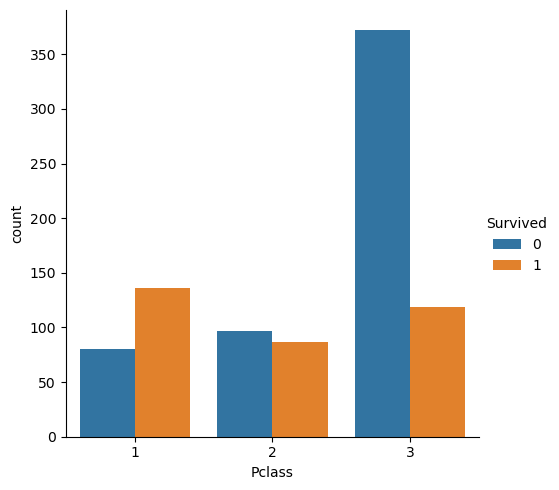

In [17]:
sns.catplot(x='Pclass',hue='Survived',kind='count',data=train_data)

<Axes: xlabel='Pclass', ylabel='Age'>

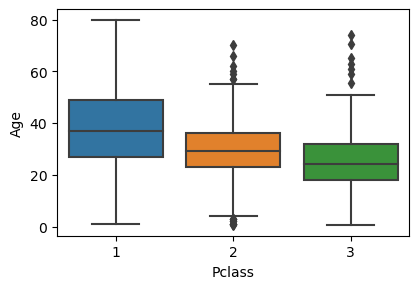

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,6)
sns.boxplot(x='Pclass',y='Age',data=train_data)

# Replacing null values in Age column using function

In [19]:
def add_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return train_data[train_data['Pclass']==1]['Age'].median()
        elif Pclass==2:
            return train_data[train_data['Pclass']==2]['Age'].median()
        elif Pclass==3:
            return train_data[train_data['Pclass']==3]['Age'].median()
    else:
        return Age

In [20]:
train_data['Age']=train_data[['Age','Pclass']].apply(add_age,axis=1)

In [21]:
train_data.Sex=train_data.Sex.map({'female':0, 'male':1})
train_data.Embarked=train_data.Embarked.map({'S':0, 'C':1, 'Q':2, 'nan':'NaN'})

In [22]:
train_data.drop('Cabin',axis=1,inplace=True)

In [23]:
train_data.dropna(inplace=True)

In [24]:
train_data.drop(['Name', 'PassengerId', 'Ticket'], axis = 1, inplace = True)

# Feature engineering


In [25]:
min_age=min(train_data.Age)
max_age=max(train_data.Age)
min_fare=min(train_data.Fare)
max_fare=max(train_data.Fare)

In [26]:
train_data.Age = (train_data.Age-min_age)/(max_age-min_age)
train_data.Fare = (train_data.Fare-min_fare)/(max_fare-min_fare)

# Print the finalised data

In [27]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,0
1,1,1,0,0.472229,1,0,0.139136,1
2,1,3,0,0.321438,0,0,0.015469,0
3,1,1,0,0.434531,1,0,0.103644,0
4,0,3,1,0.434531,0,0,0.015713,0


# Split the data set into x and y data

In [28]:
x_data=train_data.drop('Survived',axis=1)
y_data=train_data['Survived']

# Split the data set into training data and test data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.2, random_state=0, stratify=y_data)

# Create the model

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()


# Train the model and create predictions


In [35]:
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

# Let’s see how accurate is our model for predictions:

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       110
           1       0.81      0.79      0.80        68

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



In [38]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test_data, predictions))

Accuracy :  0.848314606741573


# Let’s see the confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_data, predictions)

array([[97, 13],
       [14, 54]], dtype=int64)

# confusion matrix using seaborn


In [40]:
cf_matrix=confusion_matrix(y_test_data, predictions)

<Axes: >

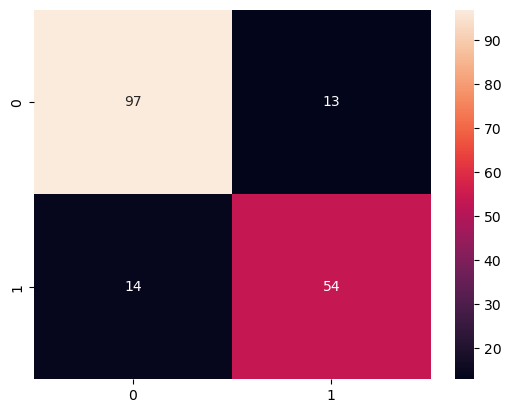

In [41]:
import seaborn as sns

sns.heatmap(cf_matrix, annot=True)

# Cleaning test datset

In [42]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
test_data['Age']=test_data[['Age','Pclass']].apply(add_age,axis=1)

In [45]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].median())

In [46]:
test_data.Sex=test_data.Sex.map({'female':0, 'male':1})
test_data.Embarked=test_data.Embarked.map({'S':0, 'C':1, 'Q':2, 'nan':'NaN'})

In [47]:
min_age1=min(test_data.Age)
max_age1=max(test_data.Age)
min_fare1=min(test_data.Fare)
max_fare1=max(test_data.Fare)

In [48]:
test_data.Age = (test_data.Age-min_age1)/(max_age1-min_age1)
test_data.Fare = (test_data.Fare-min_fare1)/(max_fare1-min_fare1)

In [49]:
test_data.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [50]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [51]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.452723,0,0,0.015282,2
1,3,0,0.617566,1,0,0.013663,0
2,2,1,0.815377,0,0,0.018909,2
3,3,1,0.353818,0,0,0.016908,0
4,3,0,0.287881,1,1,0.023984,0


# Predicting the Survival


In [52]:
prediction=model.predict(test_data)
test=pd.read_csv("titanic_test.csv")
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": prediction})
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
